In [81]:
import pandas as pd

json_path = '/content/vnp.json'

with open(json_path, 'r') as json_file:
    json_data = pd.read_json(json_file)

result_data = json_data['esgChart']['result']

data = []

for item in result_data:
    peer_group = item['peerGroup']

    for series_type in ['symbolSeries', 'peerSeries']:
        series_data = item.get(series_type, {})
        timestamp = series_data.get('timestamp', [])
        esg_score = series_data.get('esgScore', [])
        governance_score = series_data.get('governanceScore', [])
        environment_score = series_data.get('environmentScore', [])
        social_score = series_data.get('socialScore', [])

        for i in range(len(timestamp)):
            data.append({
                'PeerGroup': peer_group,
                'Timestamp': timestamp[i],
                'ESGScore': esg_score[i],
                'GovernanceScore': governance_score[i],
                'EnvironmentScore': environment_score[i],
                'SocialScore': social_score[i],
                'SeriesType': series_type
            })

df_all = pd.DataFrame(data)

df_all

,PeerGroup,Timestamp,ESGScore,GovernanceScore,EnvironmentScore,SocialScore,SeriesType
0,Retailing,1409529600,51.000000,50.000000,44.000000,56.000000,symbolSeries
1,Retailing,1412121600,51.000000,50.000000,44.000000,56.000000,symbolSeries
2,Retailing,1414800000,51.000000,50.000000,44.000000,56.000000,symbolSeries
3,Retailing,1417392000,50.000000,50.000000,46.000000,55.000000,symbolSeries
4,Retailing,1420070400,50.000000,50.000000,46.000000,55.000000,symbolSeries
...,...,...,...,...,...,...,...
187,Retailing,1648771200,NaN,NaN,NaN,NaN,peerSeries
188,Retailing,1651363200,16.393158,5.512157,2.918627,7.687255,peerSeries
189,Retailing,1654041600,NaN,NaN,NaN,NaN,peerSeries
190,Retailing,1656633600,NaN,NaN,NaN,NaN,peerSeries


In [ ]:
!pip install tsfresh

In [83]:
import yfinance as yf

In [84]:
symbol = "AMZN"
start_date = "2019-09-01"
end_date = "2023-09-01"

In [85]:
amazon_data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [86]:
amazon_data.to_csv("amazon_stock_prices.csv")

In [87]:
amazon_stock_data = pd.read_csv("amazon_stock_prices.csv")
amazon_stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-03,88.500000,90.040001,88.400002,89.491997,89.491997,70860000
1,2019-09-04,90.250000,90.381500,89.811501,90.030998,90.030998,46482000
2,2019-09-05,91.097504,92.099998,90.778999,92.036003,92.036003,66216000
3,2019-09-06,91.911003,92.032501,91.320000,91.675499,91.675499,49938000
4,2019-09-09,92.050003,92.500000,91.230499,91.567497,91.567497,59990000
...,...,...,...,...,...,...,...
1002,2023-08-25,132.470001,133.869995,130.580002,133.259995,133.259995,44124800
1003,2023-08-28,133.779999,133.949997,131.850006,133.139999,133.139999,34083100
1004,2023-08-29,133.380005,135.139999,133.250000,134.910004,134.910004,38646100
1005,2023-08-30,134.929993,135.679993,133.919998,135.070007,135.070007,36137000


Feature Extraction: 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]
/usr/local/lib/python3.10/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['Close__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


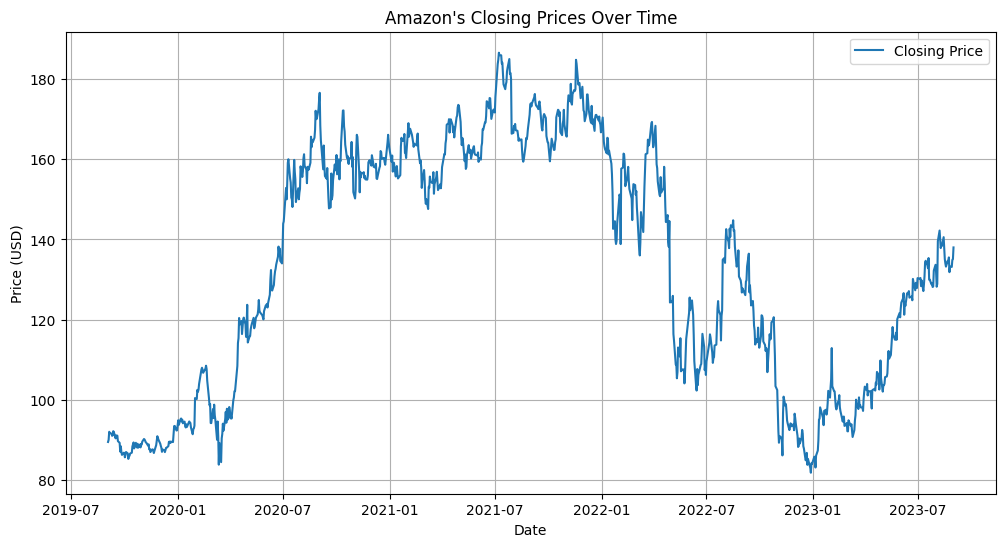

In [88]:
import pandas as pd
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
import matplotlib.pyplot as plt

amazon_stock_data = pd.read_csv("amazon_stock_prices.csv")

amazon_stock_data['Date'] = pd.to_datetime(amazon_stock_data['Date'])

amazon_stock_data.set_index('Date', inplace=True)

close_data = amazon_stock_data[['Close']].copy()
close_data['id'] = 1

extracted_features_close = extract_features(close_data, column_id='id')

imputed_features_close = impute(extracted_features_close)

plt.figure(figsize=(12, 6))
plt.title("Amazon's Closing Prices Over Time")
plt.plot(amazon_stock_data.index, amazon_stock_data['Close'], label='Closing Price')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()



In [89]:

selected_features = [
    "Close__variance",
    "Close__skewness",
    "Close__kurtosis",
    "Close__autocorrelation__lag_1",
    "Close__variance_larger_than_standard_deviation",
    "Close__mean_abs_change"
]

for feature in selected_features:
    value = imputed_features_close.loc[1, feature]
    print(f"{feature}: {value}")

Close__variance: 923.6888168160419
Close__skewness: -0.12255092437688786
Close__kurtosis: -1.4535120937829429
Close__autocorrelation__lag_1: 0.9950054805973446
Close__variance_larger_than_standard_deviation: 1.0
Close__mean_abs_change: 2.1631809560726465


In [90]:
import pandas as pd
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute


data = df_all.copy()

data = data.sort_values('Timestamp')
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data.set_index('Timestamp', inplace=True)

data['column_id'] = 1
data.dropna(subset=['ESGScore'], inplace=True)

extracted_features = extract_features(data, column_id='column_id', column_sort=None, column_value='ESGScore')
imputed_features = impute(extracted_features)




Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]
/usr/local/lib/python3.10/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['ESGScore__fft_coefficient__attr_"real"__coeff_79'
 'ESGScore__fft_coefficient__attr_"real"__coeff_80'
 'ESGScore__fft_coefficient__attr_"real"__coeff_81'
 'ESGScore__fft_coefficient__attr_"real"__coeff_82'
 'ESGScore__fft_coefficient__attr_"real"__coeff_83'
 'ESGScore__fft_coefficient__attr_"real"__coeff_84'
 'ESGScore__fft_coefficient__attr_"real"__coeff_85'
 'ESGScore__fft_coefficient__attr_"real"__coeff_86'
 'ESGScore__fft_coefficient__attr_"real"__coeff_87'
 'ESGScore__fft_coefficient__attr_"real"__coeff_88'
 'ESGScore__fft_coefficient__attr_"real"__coeff_89'
 'ESGScore__fft_coefficient__attr_"real"__coeff_90'
 'ESGScore__fft_coefficient__attr_"real"__coeff_91'
 'ESGScore__fft_coefficient__attr_"real"__coeff_92'
 'ESGScore__fft_coefficient__attr_"real"__coeff_93'
 'ESGScore__fft_coefficient__attr_"real"

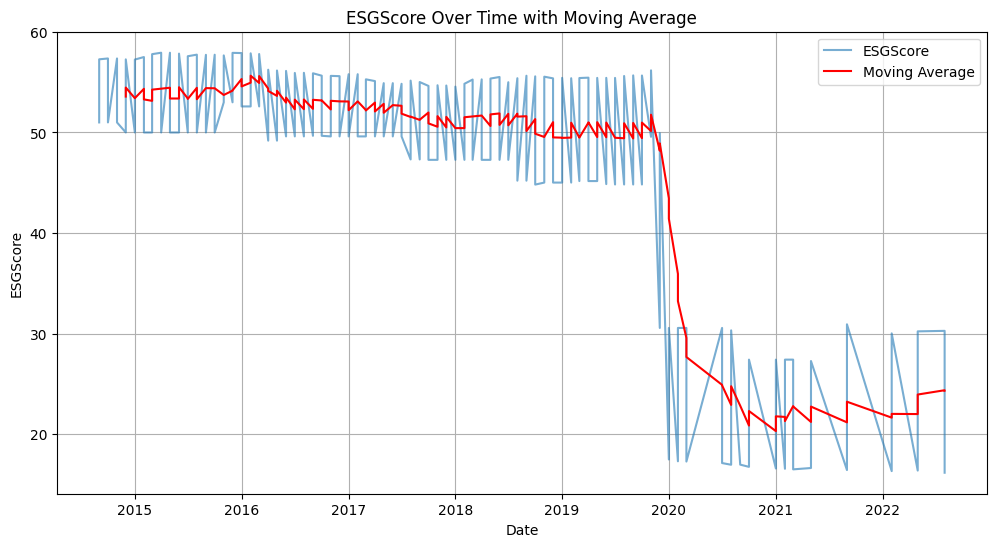

In [94]:
data_sorted = data.sort_index()
moving_avg = data['ESGScore'].rolling(window=7).mean()
plt.figure(figsize=(12, 6))
plt.title("ESGScore Over Time with Moving Average")
plt.plot(data.index, data['ESGScore'], label='ESGScore', alpha=0.6)
plt.plot(moving_avg.index, moving_avg, label='Moving Average', color='red')
plt.xlabel("Date")
plt.ylabel("ESGScore")
plt.legend()
plt.grid(True)
plt.show()


In [92]:

selected_features = [
    "ESGScore__skewness",
    "ESGScore__kurtosis",
    "ESGScore__autocorrelation__lag_1",
    "ESGScore__variance_larger_than_standard_deviation",
    "ESGScore__mean_abs_change"
]

for feature in selected_features:
    value = imputed_features.loc[1, feature]
    print(f"{feature}: {value}")

ESGScore__skewness: -1.4284893262571294
ESGScore__kurtosis: 0.8247021715721874
ESGScore__autocorrelation__lag_1: 0.7402479525561316
ESGScore__variance_larger_than_standard_deviation: 1.0
ESGScore__mean_abs_change: 7.209148769998373


Model: Linear Regression
MAE: 1.6636071014320541
MSE: 5.94658963901696
R-squared (R2) Score: 0.9673873031265033

Model: Random Forest
MAE: 0.21168816049426886
MSE: 0.22524538107278144
R-squared (R2) Score: 0.9987646937520485

Model: Gradient Boosting
MAE: 0.22639420032447521
MSE: 0.34712517514296287
R-squared (R2) Score: 0.998096272182661



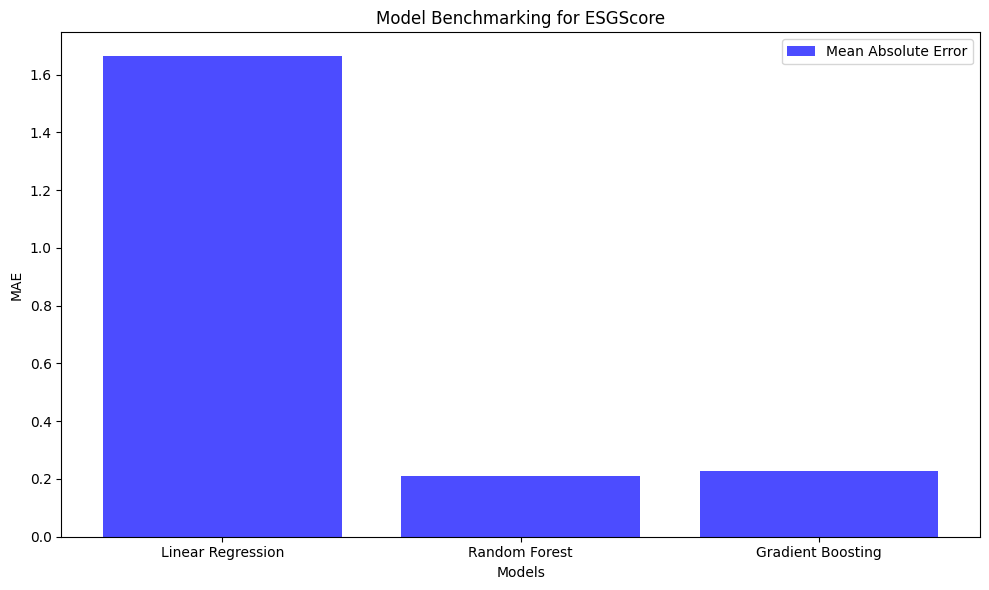

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


X = data[['GovernanceScore', 'EnvironmentScore', 'SocialScore']]
y = data['ESGScore']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

mae_scores = {}
mse_scores = {}
r2_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mae_scores[model_name] = mae
    mse_scores[model_name] = mse
    r2_scores[model_name] = r2

for model_name in models.keys():
    print(f"Model: {model_name}")
    print(f"MAE: {mae_scores[model_name]}")
    print(f"MSE: {mse_scores[model_name]}")
    print(f"R-squared (R2) Score: {r2_scores[model_name]}\n")

plt.figure(figsize=(10, 6))
plt.bar(models.keys(), mae_scores.values(), color='blue', alpha=0.7, label='Mean Absolute Error')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Model Benchmarking for ESGScore')
plt.legend()
plt.tight_layout()
plt.show()